# Lab 5 Linear Regression
### Armen Khachatrian
### CS 663 Machine Learning

> Statistical way Algorithm

> Step 1: plot the data

> Step 2: look at F-statistics, p-value

> Step 3: R^2

> Step 4: estimated coefficients and their p-values

> Step 5: exam X for homoscedasticity using BF test

### Toluca dataset

In [1]:
import pandas as pd

data_toluca = pd.read_csv("toluca.csv")
data_toluca.info() #small dataset (n_observations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
lotSize      25 non-null int64
workHours    25 non-null int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [2]:
data_toluca.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


> Note: there are two cases:

> 1) where Lot Size is target (by the task)

> 2) where target value is Work Hours (after the class 02/26)

### Case 1, Toluca: where Lot Size is target

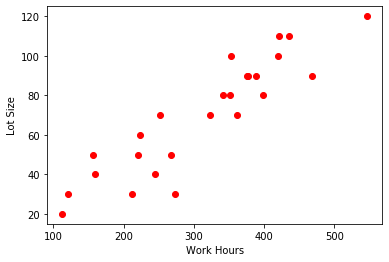

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data_toluca.iloc[:,1], data_toluca.iloc[:,0], color = 'red')
plt.ylabel("Lot Size")
plt.xlabel("Work Hours")
plt.show()

> Note:\
> a) dashed line is regression line (we just flat it), \
> b)It seems that HERE is homoscedastic variance of errors(SLR 5)

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Lot Size')]

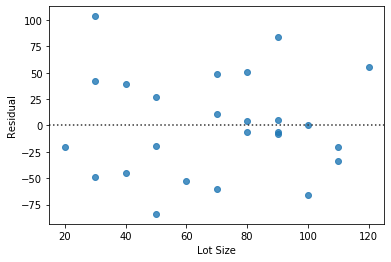

In [6]:
r1 = sns.residplot('lotSize', 'workHours', data = data_toluca)
r1.set(xlabel = 'Lot Size', ylabel = 'Residual')

In [7]:
data_toluca.isna().sum() #no Nans

lotSize      0
workHours    0
dtype: int64

> Note:\
> control variable is positive and HIGH correlated with target

In [8]:
corr_matrix = data_toluca.corr()
corr_matrix['lotSize'].sort_values(ascending=False) 

lotSize      1.000000
workHours    0.906385
Name: lotSize, dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_toluca.drop('workHours', axis =1), data_toluca.iloc[:,1])
#Coding remark:
#lin_reg.fit(data_toluca.iloc[:,0], data_toluca.iloc[:,1]) - this does not work because iloc -> 
#give us pd.Series (1-dimensional array), and you can not give input to sklearn like that type 
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Linear Regression model slope (where Lot Size is target) =', lin_reg.coef_)
print('Linear Regression model intercept (where Lot Size is target) =', lin_reg.intercept_)

Linear Regression model slope (where Lot Size is target) = [3.57020202]
Linear Regression model intercept (where Lot Size is target) = 62.365858585858575


### Case 2, Toluca: where Work Hours is target

#### Step 1: plot the data

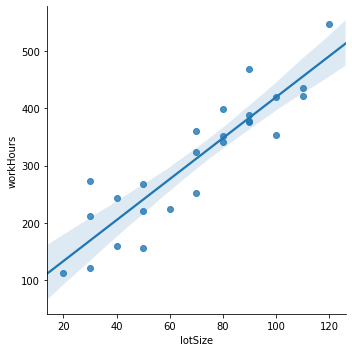

In [12]:
import seaborn as sns
sns.lmplot(y ='workHours', x='lotSize' , data=data_toluca) #with regression line

#### Step 2: look at F-statistics, p-value

> Note:
> * p values is the probability of rejecting null hypothesis\
> * H_0 = X doesnt predict Y - null hypothesis \ 
> * H_1 = X predicts Y - actual hypothesis \
> * We want to have at least 95% of confidence intervals (p value = 0.05) \
> * we are interested in high F value and low p-value \
> * F value means a degree of how changes Y if we change X

In [13]:
import statsmodels.formula.api as smf
tolucaOLSmodel = smf.ols('workHours ~ lotSize', data_toluca).fit()

print('Fvalue', tolucaOLSmodel.fvalue, '\nPvalue:', tolucaOLSmodel.f_pvalue)

Fvalue 105.87570891593043 
Pvalue: 4.4488275871889437e-10


#### Step 3: R^2

In [14]:
tolucaOLSmodel.rsquared

0.8215334744346305

#### Step 4: estimated coefficients and their p-values

In [15]:
tolucaOLSmodel.params

Intercept    62.365859
lotSize       3.570202
dtype: float64

In [16]:
tolucaOLSmodel.pvalues # p_values for beta0 and beta1

Intercept    2.585094e-02
lotSize      4.448828e-10
dtype: float64

#### Step 5: exam X for homoscedasticity using BF test

In [17]:
import scipy as sp

sample_1 = tolucaOLSmodel.resid[1:round(len(tolucaOLSmodel.resid)/2)]
sample_2 = tolucaOLSmodel.resid[round(len(tolucaOLSmodel.resid)/2)+1 :]
sp.stats.levene(sample_1, sample_2, center='median')

LeveneResult(statistic=0.045672820144710385, pvalue=0.8328329469420114)

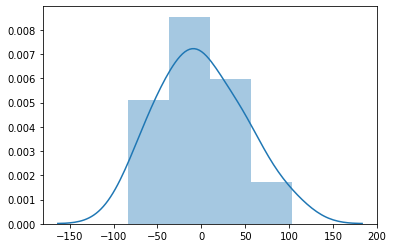

In [18]:
sns.distplot(tolucaOLSmodel.resid)

> Note: \
> Check are residuals normally distributed?

In [25]:
sp.stats.shapiro(tolucaOLSmodel.resid)[1] #1 - the p-value for the hypothesis test

0.8625532984733582

### Credit dataset 

In [26]:
data_credit = pd.read_csv("credit.csv")
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


> Note: \
> Limit is target \
> Income, Rating, Cards, Age, Education - predictors

In [27]:
data_credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


> Note: \
> Distribution of data

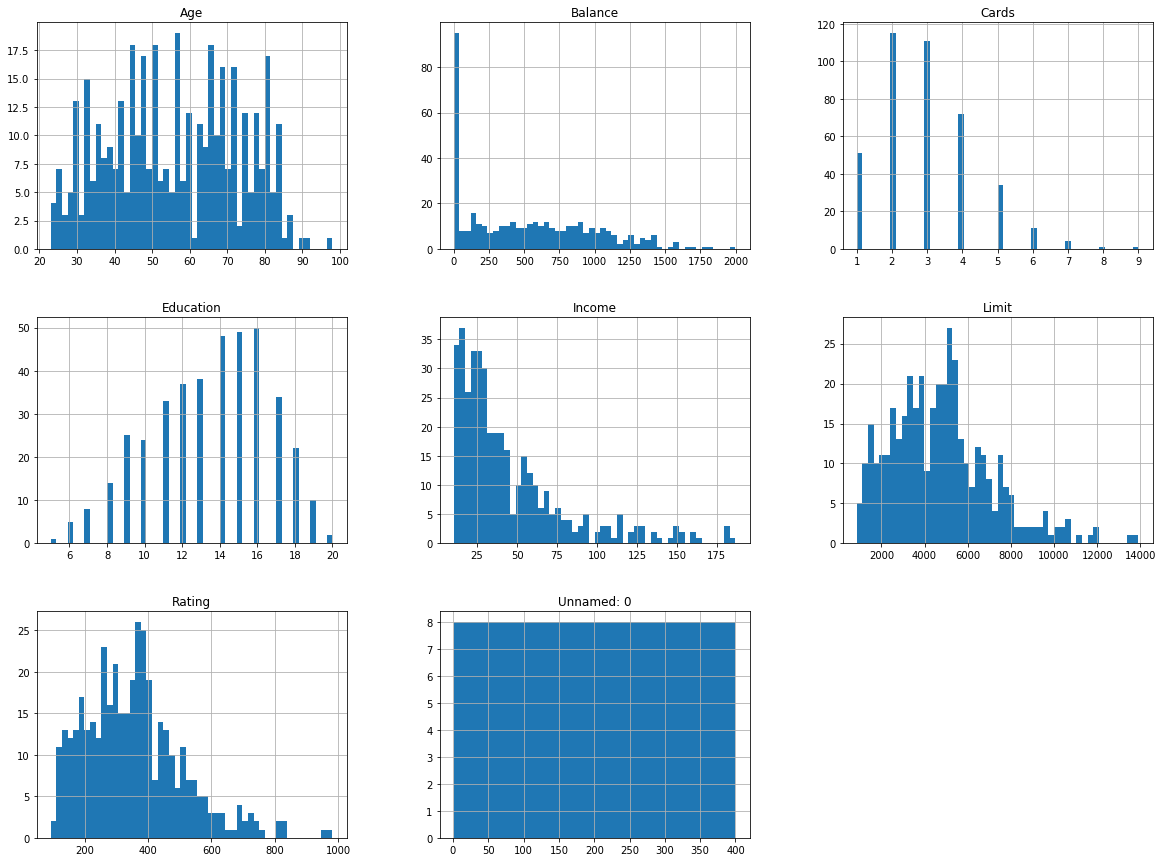

In [28]:
data_credit.hist(bins=50, figsize=(20,15))
plt.show()

> Note: we can plot target vs each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30df1ef0>,
      dtype=object)

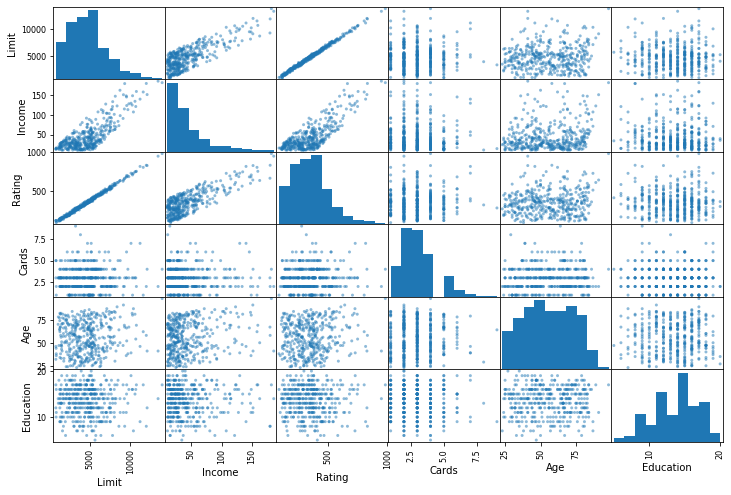

In [33]:
attributes = ['Limit', 'Income', 'Rating', 'Cards', 'Age', 'Education']
pd.plotting.scatter_matrix(data_credit[attributes], figsize=(12, 8))

In [36]:
data_credit.isna().sum() #No NaNs

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

> Note:\
> Calculate correlation

In [37]:
corr_matrix = data_credit.corr()
corr_matrix['Limit'].sort_values(ascending=False)

Limit         1.000000
Rating        0.996880
Balance       0.861697
Income        0.792088
Age           0.100888
Unnamed: 0    0.024172
Cards         0.010231
Education    -0.023549
Name: Limit, dtype: float64

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

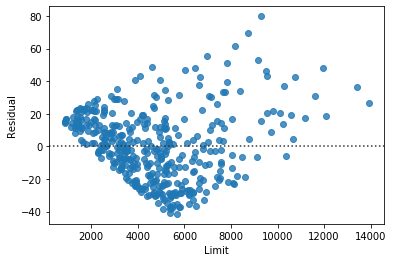

In [41]:
res1 = sns.residplot('Limit', 'Income', data = data_credit)
res1.set(xlabel = 'Limit', ylabel = 'Residual') # heteroscedasticity

> Note:\
> Seems that with Income the assumption (SLR 5, homoscedasticity) does not hold  

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

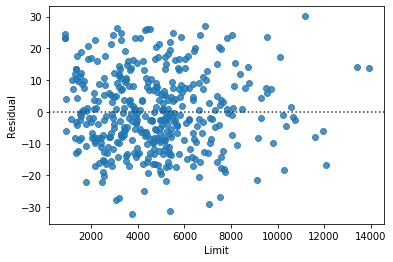

In [42]:
res2 = sns.residplot('Limit', 'Rating', data = data_credit)
res2.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

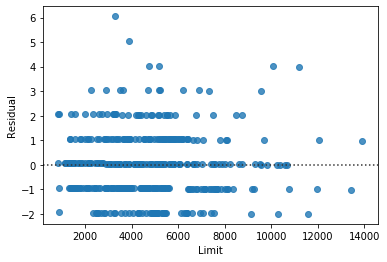

In [44]:
res3 = sns.residplot('Limit', 'Cards', data = data_credit)
res3.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

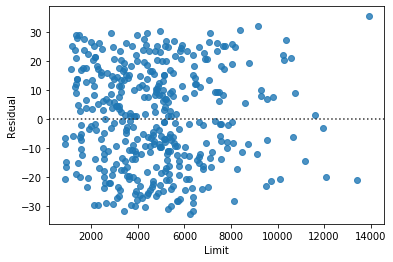

In [45]:
res4 = sns.residplot('Limit', 'Age', data = data_credit)
res4.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

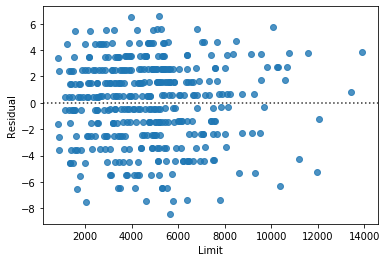

In [46]:
res5 = sns.residplot('Limit', 'Education', data = data_credit)
res5.set(xlabel = 'Limit', ylabel = 'Residual')

### Using Algorithm

#### Step 1: plot the data

> Note: \
> Step-by-step plot with regression line

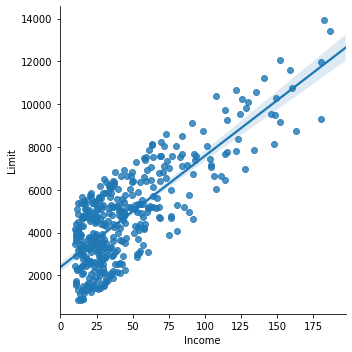

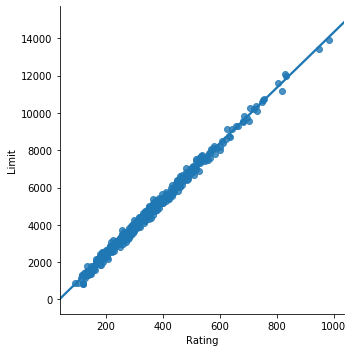

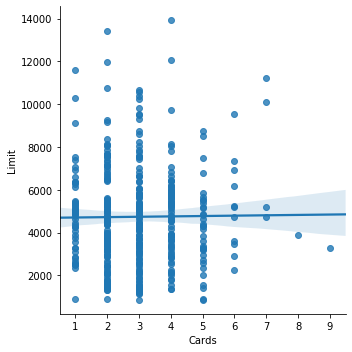

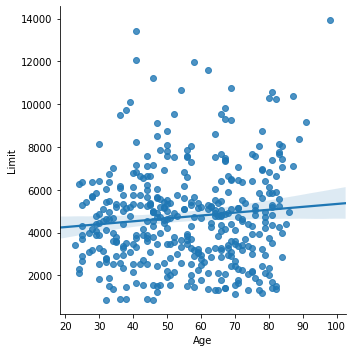

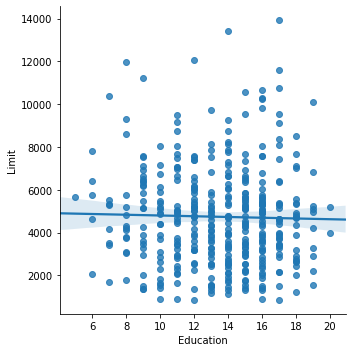

In [38]:
sns.lmplot(y ='Limit', x='Income', data=data_credit)
sns.lmplot(y ='Limit', x='Rating', data=data_credit)
sns.lmplot(y ='Limit', x='Cards', data=data_credit)
sns.lmplot(y ='Limit', x='Age', data=data_credit)
sns.lmplot(y ='Limit', x='Education' , data=data_credit)

> Note: \
> We can clearly seen that Rating and Income predict Limit

### Two types of model: multiple regression and OLS by each feature

### *Model 1: OLS by each feature*

#### Step 2 OLS: look at F-statistics, p-value

In [49]:
creditOLSmodel1 = smf.ols('Limit ~ Income', data_credit).fit()
creditOLSmodel2 = smf.ols('Limit ~ Rating', data_credit).fit()
creditOLSmodel3 = smf.ols('Limit ~ Cards', data_credit).fit()
creditOLSmodel4 = smf.ols('Limit ~ Age', data_credit).fit()
creditOLSmodel5 = smf.ols('Limit ~ Education', data_credit).fit()


print('Model 1 (Limit ~ Income): Fvalue', creditOLSmodel1.fvalue, '\nPvalue:', creditOLSmodel1.f_pvalue)
print('Model 2 (Limit ~ Rating): Fvalue', creditOLSmodel2.fvalue, '\nPvalue:', creditOLSmodel2.f_pvalue)
print('Model 3 (Limit ~ Cards): Fvalue', creditOLSmodel3.fvalue, '\nPvalue:', creditOLSmodel3.f_pvalue)
print('Model 4 (Limit ~ Age): Fvalue', creditOLSmodel4.fvalue, '\nPvalue:', creditOLSmodel4.f_pvalue)
print('Model 5 (Limit ~ Education): Fvalue', creditOLSmodel5.fvalue, '\nPvalue:', creditOLSmodel5.f_pvalue)

Model 1 (Limit ~ Income): Fvalue 670.1809155866111 
Pvalue: 2.391789442285233e-87
Model 2 (Limit ~ Rating): Fvalue 63478.33074542941 
Pvalue: 0.0
Model 3 (Limit ~ Cards): Fvalue 0.04166707131291616 
Pvalue: 0.8383600476935473
Model 4 (Limit ~ Age): Fvalue 4.092648846827523 
Pvalue: 0.04373814516304641
Model 5 (Limit ~ Education): Fvalue 0.22082677373451773 
Pvalue: 0.6386680504767156


#### Step 3 OLS: R^2

In [51]:
print('R^2, Model 1 (Limit ~ Income) = ', creditOLSmodel1.rsquared)
print('R^2, Model 2 (Limit ~ Rating) = ', creditOLSmodel2.rsquared)
print('R^2, Model 3 (Limit ~ Cards) = ', creditOLSmodel3.rsquared)
print('R^2, Model 4 (Limit ~ Age) = ', creditOLSmodel4.rsquared)
print('R^2, Model 5 (Limit ~ Education) = ', creditOLSmodel5.rsquared)

R^2, Model 1 (Limit ~ Income) =  0.6274039404819071
R^2, Model 2 (Limit ~ Rating) =  0.9937692100445441
R^2, Model 3 (Limit ~ Cards) =  0.00010468017486586767
R^2, Model 4 (Limit ~ Age) =  0.010178372717245532
R^2, Model 5 (Limit ~ Education) =  0.0005545334620582487


> Note:
> * Our assumption that Income and Rating predict Limit better holds
> * R squared of Ratings is very high (99%), I suppose in that case we do not need to build any regression model
> * R squared of Income makes sense (63%), we can run model with this feature to try to predict sth
> * The models with other features fit poor 

#### Step 4: estimated coefficients and their p-values

In [57]:
print('Intercept, Model 1 (Limit ~ Income) = ', creditOLSmodel1.params[0])
print('Slope, Model 1 (Limit ~ Income) = ', creditOLSmodel1.params[1])
print('Pvalue (Intercept), Model 1 (Limit ~ Income) = ', creditOLSmodel1.pvalues[0])
print('Pvalue (Slope), Model 1 (Limit ~ Income) = ', creditOLSmodel1.pvalues[1])

Intercept, Model 1 (Limit ~ Income) =  2389.8694089155265
Slope, Model 1 (Limit ~ Income) =  51.87502060443274
Pvalue (Intercept), Model 1 (Limit ~ Income) =  1.2643869729181443e-65
Pvalue (Slope), Model 1 (Limit ~ Income) =  2.3917894422843984e-87


In [58]:
print('Intercept, Model 2 (Limit ~ Rating) = ', creditOLSmodel2.params[0])
print('Slope, Model 2 (Limit ~ Rating) = ', creditOLSmodel2.params[1])
print('Pvalue (Intercept), Model 2 (Limit ~ Rating) = ', creditOLSmodel2.pvalues[0])
print('Pvalue (Slope), Model 2 (Limit ~ Rating) = ', creditOLSmodel2.pvalues[1])

Intercept, Model 2 (Limit ~ Rating) =  -542.9282299869014
Slope, Model 2 (Limit ~ Rating) =  14.871607116658883
Pvalue (Intercept), Model 2 (Limit ~ Rating) =  2.4676729186132544e-78
Pvalue (Slope), Model 2 (Limit ~ Rating) =  0.0


> Note:\
> pvalue = 0 means that the results were highly significant \
> In other words: very unlikely to have occured by chance alone

In [59]:
print('Intercept, Model 3 (Limit ~ Cards) = ', creditOLSmodel3.params[0])
print('Slope, Model 3 (Limit ~ Cards) = ', creditOLSmodel3.params[1])
print('Pvalue (Intercept), Model 3 (Limit ~ Cards) = ', creditOLSmodel3.pvalues[0])
print('Pvalue (Slope), Model 3 (Limit ~ Cards) = ', creditOLSmodel3.pvalues[1])

Intercept, Model 3 (Limit ~ Cards) =  4684.666246822012
Slope, Model 3 (Limit ~ Cards) =  17.221894565677985
Pvalue (Intercept), Model 3 (Limit ~ Cards) =  2.8435242910181426e-49
Pvalue (Slope), Model 3 (Limit ~ Cards) =  0.8383600476934796


In [60]:
print('Intercept, Model 4 (Limit ~ Age) = ', creditOLSmodel4.params[0])
print('Slope, Model 4 (Limit ~ Age) = ', creditOLSmodel4.params[1])
print('Pvalue (Intercept), Model 4 (Limit ~ Age) = ', creditOLSmodel4.pvalues[0])
print('Pvalue (Slope), Model 4 (Limit ~ Age) = ', creditOLSmodel4.pvalues[1])

Intercept, Model 4 (Limit ~ Age) =  3984.0984540274276
Slope, Model 4 (Limit ~ Age) =  13.499825678763642
Pvalue (Intercept), Model 4 (Limit ~ Age) =  5.094787651774492e-22
Pvalue (Slope), Model 4 (Limit ~ Age) =  0.043738145163031567


In [61]:
print('Intercept, Model 5 (Limit ~ Education) = ', creditOLSmodel5.params[0])
print('Slope, Model 5 (Limit ~ Education) = ', creditOLSmodel5.params[1])
print('Pvalue (Intercept), Model 5 (Limit ~ Education) = ', creditOLSmodel5.pvalues[0])
print('Pvalue (Slope), Model 5 (Limit ~ Education) = ', creditOLSmodel5.pvalues[1])

Intercept, Model 5 (Limit ~ Education) =  4969.52714908905
Slope, Model 5 (Limit ~ Education) =  -17.392353092122242
Pvalue (Intercept), Model 5 (Limit ~ Education) =  3.4022126688455114e-20
Pvalue (Slope), Model 5 (Limit ~ Education) =  0.6386680504768509


#### Step 5: exam X for homoscedasticity using BF test

In [64]:
sample_1_1 = creditOLSmodel1.resid[1:round(len(creditOLSmodel1.resid)/2)]
sample_2_1 = creditOLSmodel1.resid[round(len(creditOLSmodel1.resid)/2)+1 :]
sample_1_2 = creditOLSmodel2.resid[1:round(len(creditOLSmodel2.resid)/2)]
sample_2_2 = creditOLSmodel2.resid[round(len(creditOLSmodel2.resid)/2)+1 :]
sample_1_3 = creditOLSmodel3.resid[1:round(len(creditOLSmodel3.resid)/2)]
sample_2_3 = creditOLSmodel3.resid[round(len(creditOLSmodel3.resid)/2)+1 :]
sample_1_4 = creditOLSmodel4.resid[1:round(len(creditOLSmodel4.resid)/2)]
sample_2_4 = creditOLSmodel4.resid[round(len(creditOLSmodel4.resid)/2)+1 :]
sample_1_5 = creditOLSmodel5.resid[1:round(len(creditOLSmodel5.resid)/2)]
sample_2_5 = creditOLSmodel5.resid[round(len(creditOLSmodel5.resid)/2)+1 :]

print('Model 1 (Limit ~ Income):',    sp.stats.levene(sample_1_1, sample_2_1, center='median'))
print('Model 2 (Limit ~ Rating):',    sp.stats.levene(sample_1_2, sample_2_2, center='median'))
print('Model 3 (Limit ~ Cards):',     sp.stats.levene(sample_1_3, sample_2_3, center='median'))
print('Model 4 (Limit ~ Age):',       sp.stats.levene(sample_1_4, sample_2_4, center='median'))
print('Model 5 (Limit ~ Education):', sp.stats.levene(sample_1_5, sample_2_5, center='median'))

Model 1 (Limit ~ Income): LeveneResult(statistic=0.32009626294497495, pvalue=0.571870236514716)
Model 2 (Limit ~ Rating): LeveneResult(statistic=0.2675802083809083, pvalue=0.6052484358862235)
Model 3 (Limit ~ Cards): LeveneResult(statistic=0.04321524023649624, pvalue=0.8354273826721773)
Model 4 (Limit ~ Age): LeveneResult(statistic=0.05143849367742399, pvalue=0.820695859665673)
Model 5 (Limit ~ Education): LeveneResult(statistic=0.043287813189270025, pvalue=0.8352912398185401)


Text(0.5, 1.0, 'Residuals of Model 1 (Limit ~ Income):')

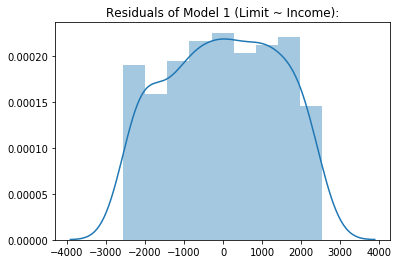

In [68]:
sns.distplot(creditOLSmodel1.resid).set_title('Residuals of Model 1 (Limit ~ Income):')

Text(0.5, 1.0, 'Residuals of Model 2 (Limit ~ Rating):')

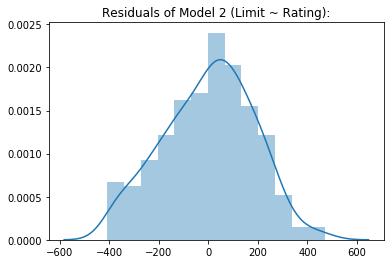

In [69]:
sns.distplot(creditOLSmodel2.resid).set_title('Residuals of Model 2 (Limit ~ Rating):')

Text(0.5, 1.0, 'Residuals of Model 3 (Limit ~ Cards):')

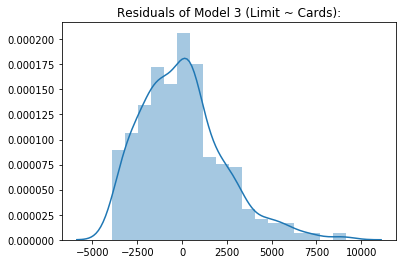

In [70]:
sns.distplot(creditOLSmodel3.resid).set_title('Residuals of Model 3 (Limit ~ Cards):')

Text(0.5, 1.0, 'Residuals of Model 4 (Limit ~ Age):')

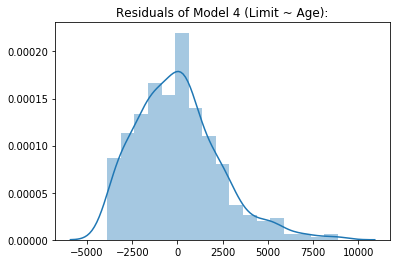

In [71]:
sns.distplot(creditOLSmodel4.resid).set_title('Residuals of Model 4 (Limit ~ Age):')

Text(0.5, 1.0, 'Residuals of Model 5 (Limit ~ Education):')

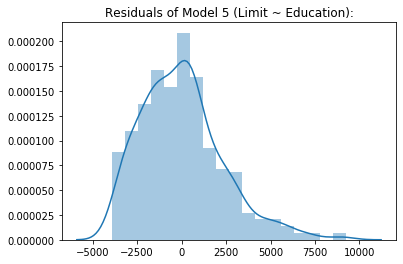

In [72]:
sns.distplot(creditOLSmodel5.resid).set_title('Residuals of Model 5 (Limit ~ Education):')

> Note:\
> Check are residuals normally distributed?\
> The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution

In [74]:
print('Probability of Model 1 (Limit ~ Income):' , sp.stats.shapiro(creditOLSmodel1.resid)[1])
print('Probability of Model 2 (Limit ~ Rating):' , sp.stats.shapiro(creditOLSmodel2.resid)[1])
print('Probability of Model 3 (Limit ~ Cards):' , sp.stats.shapiro(creditOLSmodel3.resid)[1])
print('Probability of Model 4 (Limit ~ Age):' , sp.stats.shapiro(creditOLSmodel4.resid)[1])
print('Probability of Model 5 (Limit ~ Education):' , sp.stats.shapiro(creditOLSmodel5.resid)[1])

Probability of Model 1 (Limit ~ Income): 7.817178016011894e-09
Probability of Model 2 (Limit ~ Rating): 0.006641296669840813
Probability of Model 3 (Limit ~ Cards): 2.4617801130943917e-09
Probability of Model 4 (Limit ~ Age): 9.852547222521935e-09
Probability of Model 5 (Limit ~ Education): 2.298510715093016e-09


### *Model 2: multiple regression*

In [79]:
creditMLRmodel = smf.ols(formula = 'Limit ~ Income + Rating + Cards + Age + Education', data = data_credit).fit()

print('Model MLR: Intercept', creditMLRmodel.params[0])
print('Model MLR: Coefficient (Income)', creditMLRmodel.params[1])
print('Model MLR: Coefficient (Rating)', creditMLRmodel.params[2])
print('Model MLR: Coefficient (Cards)', creditMLRmodel.params[3])
print('Model MLR: Coefficient (Age)', creditMLRmodel.params[4])
print('Model MLR: Coefficient (Education)', creditMLRmodel.params[5])

Model MLR: Intercept -381.08641789899457
Model MLR: Coefficient (Income) 0.11840443208256168
Model MLR: Coefficient (Rating) 14.886954117721642
Model MLR: Coefficient (Cards) -71.73062805474112
Model MLR: Coefficient (Age) -0.07547056609518227
Model MLR: Coefficient (Education) 3.2491745105608345


> Note:\
> Print a summary of the fitted model

In [80]:
creditMLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.795e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:14:36   Log-Likelihood:                -2578.2
No. Observations:                 400   AIC:                             5168.
Df Residuals:                     394   BIC:                             5192.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -381.0864     48.655     -7.832      0.000    -476.743    -285.430
Income         0.1184      0.363      0.326      0.745      -0.596       0.832
Rating        14.8870      0.082    181.669      0.000      14.726      15.048
Cards        -71.7306      5.657    -12.680      0.000     -82.852     -60.609
Age           -0.0755      0.454     -0.166      0.868      -0.968       0.817
Education      3.2492      2.464      1.319      0.188      -1.595       8.094
==============================================================================
Omnibus:                        6.957   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.805
Skew:                          -0.211   Prob(JB):                       0.0549
Kurtosis:                       2.587   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Note:\
> Conclusion from summary:
* Ratings and Cards have small p-values, whereas Newspaper have a large p-value
    * Reject the null hypothesis for Ratings and Cards
        * There is association between features and Limit
    * Fail to reject the null hypothesis for Income, Age, Education
        * There is no association
* Income, Rating, and Education ad spending are both positively associated with Limit
    * Cards and Age are negatively associated with Limit
        * However, this is irrelevant since we have failed to reject the null hypothesis for Income, Age, Education
* This model has a very high R-squared (0.996)

In [81]:
sample_1_MLR = creditMLRmodel.resid[1:round(len(creditMLRmodel.resid)/2)]
sample_2_MLR = creditMLRmodel.resid[round(len(creditMLRmodel.resid)/2)+1 :]
print('Model MLR:',    sp.stats.levene(sample_1_MLR, sample_2_MLR, center='median'))

Model MLR: LeveneResult(statistic=0.051588054166173326, pvalue=0.8204398361688398)


Text(0.5, 1.0, 'Residuals of MLR')

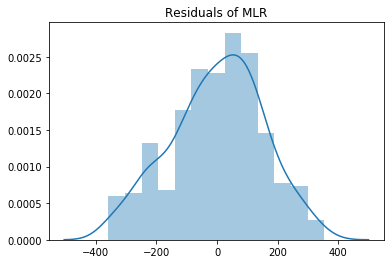

In [82]:
sns.distplot(creditMLRmodel.resid).set_title('Residuals of MLR')

In [83]:
print('Probability of MLR' , sp.stats.shapiro(creditMLRmodel.resid)[1])

Probability of MLR 0.004701552912592888


> Note:\
> The probability of data was drawn from a normal distribution (null hypothesis) is very low

### End.